In [1]:
import os
import json
import string
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords


In [2]:
#load data for NLTK (run once only)
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
# Or open the JSON data file from working directory
data =  open("Article_1.json", "r")

In [3]:
# Load in the JSON object in the file
jdata = json.load(data)
jdata.keys()

dict_keys(['URL', 'Text', '_id'])

In [4]:
# values in the JSON object
print(jdata['URL'])
print(jdata['Text'])
print(jdata['_id'])

http://www.slate.com/articles/life/food/2015/08/i_was_gluten_free_before_it_was_cool_diagnosed_with_celiac_in_the_1990s.html
Gluten, it turns out, is not an actual grain or visible ingredient but the substance, made of two proteins, that gives dough its elasticity. Celiac is an autoimmune disorder in which gluten wreaks havoc on the small intestine, blocking other nutrients from being absorbed. When I was diagnosed with celiac, my doctor taught me to pinpoint wheaty assassins lurking in foods you’d never suspect: soy sauce, gravy, candy bars. Back then, the crunchiest health food store in my hometown was the only place where you could find wheat-free products. My mom and I would go there to eat terrible sandwiches in a tiny café in the back that was decorated like a ’70s rainforest, beaded curtains strung alongside fake agave plants. It was always empty. The wild-haired store owner would emerge from the kitchen with her hands full of rolls.

As someone who once mail-ordered a frozen pa

In [5]:
text=jdata['Text']
print(type(text))
print(len(text))
print(text[:20]) # first 20 characters, spaces are included

<class 'str'>
9336
Gluten, it turns out


In [6]:
# Convert the free text into tokens
tokens = word_tokenize(text)
type(tokens)

list

In [7]:
# number of tokens in article
print(len(tokens))
tokens[:30]

1855


['Gluten',
 ',',
 'it',
 'turns',
 'out',
 ',',
 'is',
 'not',
 'an',
 'actual',
 'grain',
 'or',
 'visible',
 'ingredient',
 'but',
 'the',
 'substance',
 ',',
 'made',
 'of',
 'two',
 'proteins',
 ',',
 'that',
 'gives',
 'dough',
 'its',
 'elasticity',
 '.',
 'Celiac']

In [8]:
# unique words
unique = set(tokens)
print("No. of unique tokens: ", len(unique))
print("Average frequency of tokens: ", len(tokens)/len(unique))
sorted(unique)[:30]

No. of unique tokens:  815
Average frequency of tokens:  2.276073619631902


['(',
 ')',
 ',',
 '.',
 '/',
 '100',
 '140',
 '1995',
 '2',
 '2012',
 '2013',
 '2014',
 '2019',
 '59',
 '60',
 '70s',
 '9',
 '9-year-old',
 '9-year-olds',
 ':',
 ';',
 '?',
 'A',
 'After',
 'All',
 'Along',
 'Also',
 'America',
 'American',
 'And']

In [9]:
# single character words
single=[w for w in unique if len(w) == 1 ] # list comprehension 
print("No. of single character tokens: ", len(single))
single

No. of single character tokens:  20


['/',
 's',
 'A',
 '9',
 ')',
 '?',
 'a',
 't',
 'I',
 '.',
 '“',
 '”',
 ',',
 '(',
 ';',
 '’',
 'm',
 ':',
 '2',
 'd']

In [10]:
# frequency of a single token
tokens.count('gluten')

18

[('.', 76), (',', 75), ('the', 65), ('a', 58), ('of', 47), ('to', 39), ('I', 37), ('in', 29), ('and', 28), ('my', 25), ('’', 23), ('“', 23), ('”', 23), ('gluten', 18), ('was', 18), ('that', 17), ('it', 16), ('with', 13), ('you', 13), ('from', 10), ('me', 10), ('like', 10), ('as', 10), ('had', 10), ('your', 10), ('when', 9), ('s', 9), ('at', 9), ('food', 8), ('?', 8), ('by', 8), ('is', 7), ('an', 7), ('for', 7), ('or', 6), ('on', 6), ('gluten-free', 6), ('this', 6), ('into', 6), ('t', 6), ('Gluten', 5), (':', 5), ('would', 5), ('The', 5), ('one', 5), ('more', 5), ('percent', 5), ('A', 5), ('so', 5), ('they', 5)]


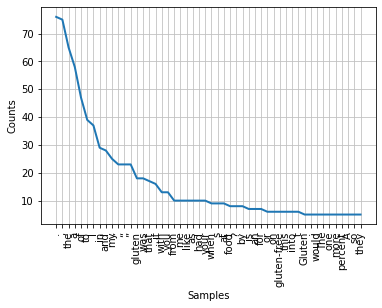

In [11]:
# Frequency distribution of words

fd = nltk.FreqDist(tokens)
print(fd.most_common(50))
fd.plot(50)

In [12]:
# word length 
fd_wlen = nltk.FreqDist([len(w) for w in unique])
sorted(fd_wlen.items())

[(1, 20),
 (2, 38),
 (3, 79),
 (4, 133),
 (5, 120),
 (6, 110),
 (7, 98),
 (8, 69),
 (9, 49),
 (10, 37),
 (11, 28),
 (12, 12),
 (13, 12),
 (14, 6),
 (15, 1),
 (16, 1),
 (20, 1),
 (21, 1)]

In [13]:
# bigrams and trigrams
bigr = nltk.bigrams(tokens[:10])
trigr = nltk.trigrams(tokens[:10])
tokens[:10]

['Gluten', ',', 'it', 'turns', 'out', ',', 'is', 'not', 'an', 'actual']

In [14]:
list(bigr)

[('Gluten', ','),
 (',', 'it'),
 ('it', 'turns'),
 ('turns', 'out'),
 ('out', ','),
 (',', 'is'),
 ('is', 'not'),
 ('not', 'an'),
 ('an', 'actual')]

In [15]:
list(trigr)

[('Gluten', ',', 'it'),
 (',', 'it', 'turns'),
 ('it', 'turns', 'out'),
 ('turns', 'out', ','),
 ('out', ',', 'is'),
 (',', 'is', 'not'),
 ('is', 'not', 'an'),
 ('not', 'an', 'actual')]

In [16]:
# text preprocessing: 
# remove punctuations
tokens_nop = [ t for t in tokens if t not in string.punctuation ]
print("Before punctuation removal: ", tokens[:50])
print("After punctuation removal: ", tokens_nop[:50])
print("No. of tokens (before punc removal): ", len(tokens))
print("No. of tokens (after punc removal): ", len(tokens_nop))
print("No. of unique tokens after punc removal: ", len(set(tokens_nop)))

Before punctuation removal:  ['Gluten', ',', 'it', 'turns', 'out', ',', 'is', 'not', 'an', 'actual', 'grain', 'or', 'visible', 'ingredient', 'but', 'the', 'substance', ',', 'made', 'of', 'two', 'proteins', ',', 'that', 'gives', 'dough', 'its', 'elasticity', '.', 'Celiac', 'is', 'an', 'autoimmune', 'disorder', 'in', 'which', 'gluten', 'wreaks', 'havoc', 'on', 'the', 'small', 'intestine', ',', 'blocking', 'other', 'nutrients', 'from', 'being', 'absorbed']
After punctuation removal:  ['Gluten', 'it', 'turns', 'out', 'is', 'not', 'an', 'actual', 'grain', 'or', 'visible', 'ingredient', 'but', 'the', 'substance', 'made', 'of', 'two', 'proteins', 'that', 'gives', 'dough', 'its', 'elasticity', 'Celiac', 'is', 'an', 'autoimmune', 'disorder', 'in', 'which', 'gluten', 'wreaks', 'havoc', 'on', 'the', 'small', 'intestine', 'blocking', 'other', 'nutrients', 'from', 'being', 'absorbed', 'When', 'I', 'was', 'diagnosed', 'with', 'celiac']
No. of tokens (before punc removal):  1855
No. of tokens (after 

In [17]:
# case lowering 
tokens_lower=[ t.lower() for t in tokens_nop ]
print(tokens_lower[:50])
len(set(tokens_lower))

['gluten', 'it', 'turns', 'out', 'is', 'not', 'an', 'actual', 'grain', 'or', 'visible', 'ingredient', 'but', 'the', 'substance', 'made', 'of', 'two', 'proteins', 'that', 'gives', 'dough', 'its', 'elasticity', 'celiac', 'is', 'an', 'autoimmune', 'disorder', 'in', 'which', 'gluten', 'wreaks', 'havoc', 'on', 'the', 'small', 'intestine', 'blocking', 'other', 'nutrients', 'from', 'being', 'absorbed', 'when', 'i', 'was', 'diagnosed', 'with', 'celiac']


770

In [18]:
# Create stopword list from standard list in nltk
stop = stopwords.words('english')
print(stop)
len(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

179

In [19]:
# Remove stopwords
tokens_nostop=[ t for t in tokens_lower if t not in stop ]
print(tokens_nostop[:50])
print("No. of tokens(before stopword removal): ", len(tokens_lower))
print("No. of tokens(after stopword removal): ", len(tokens_nostop))

['gluten', 'turns', 'actual', 'grain', 'visible', 'ingredient', 'substance', 'made', 'two', 'proteins', 'gives', 'dough', 'elasticity', 'celiac', 'autoimmune', 'disorder', 'gluten', 'wreaks', 'havoc', 'small', 'intestine', 'blocking', 'nutrients', 'absorbed', 'diagnosed', 'celiac', 'doctor', 'taught', 'pinpoint', 'wheaty', 'assassins', 'lurking', 'foods', '’', 'never', 'suspect', 'soy', 'sauce', 'gravy', 'candy', 'bars', 'back', 'crunchiest', 'health', 'food', 'store', 'hometown', 'place', 'could', 'find']
No. of tokens(before stopword removal):  1681
No. of tokens(after stopword removal):  926


In [20]:
# remove numbers
tokens_nonum = [ t for t in tokens_nostop if not t.isnumeric() ]
print("No. of tokens(after number removal): ", len(tokens_nonum))

No. of tokens(after number removal):  912


In [21]:
# check most common words
FreqDist(tokens_nonum).most_common(50)

[('gluten', 23),
 ('’', 23),
 ('“', 23),
 ('”', 23),
 ('like', 10),
 ('food', 8),
 ('gluten-free', 7),
 ('celiac', 5),
 ('would', 5),
 ('one', 5),
 ('percent', 5),
 ('first', 5),
 ('eat', 4),
 ('heard', 4),
 ('word', 4),
 ('way', 4),
 ('asked', 4),
 ('maybe', 4),
 ('made', 3),
 ('small', 3),
 ('doctor', 3),
 ('never', 3),
 ('could', 3),
 ('mom', 3),
 ('tiny', 3),
 ('also', 3),
 ('wheat', 3),
 ('allergies', 3),
 ('years', 3),
 ('much', 3),
 ('waiters', 3),
 ('still', 3),
 ('something', 3),
 ('two', 2),
 ('gives', 2),
 ('diagnosed', 2),
 ('sauce', 2),
 ('back', 2),
 ('health', 2),
 ('store', 2),
 ('find', 2),
 ('products', 2),
 ('kitchen', 2),
 ('found', 2),
 ('went', 2),
 ('feeling', 2),
 ('saying', 2),
 ('comes', 2),
 ('shoppers', 2),
 ('buy', 2)]

In [22]:
filter_list = [ "’", "“", "”","would", "could", ]
tokens_clean = [ t for t in tokens_nonum if t not in filter_list ]
FreqDist(tokens_clean).most_common(50)

[('gluten', 23),
 ('like', 10),
 ('food', 8),
 ('gluten-free', 7),
 ('celiac', 5),
 ('one', 5),
 ('percent', 5),
 ('first', 5),
 ('eat', 4),
 ('heard', 4),
 ('word', 4),
 ('way', 4),
 ('asked', 4),
 ('maybe', 4),
 ('made', 3),
 ('small', 3),
 ('doctor', 3),
 ('never', 3),
 ('mom', 3),
 ('tiny', 3),
 ('also', 3),
 ('wheat', 3),
 ('allergies', 3),
 ('years', 3),
 ('much', 3),
 ('waiters', 3),
 ('still', 3),
 ('something', 3),
 ('two', 2),
 ('gives', 2),
 ('diagnosed', 2),
 ('sauce', 2),
 ('back', 2),
 ('health', 2),
 ('store', 2),
 ('find', 2),
 ('products', 2),
 ('kitchen', 2),
 ('found', 2),
 ('went', 2),
 ('feeling', 2),
 ('saying', 2),
 ('comes', 2),
 ('shoppers', 2),
 ('buy', 2),
 ('disease', 2),
 ('decades', 2),
 ('become', 2),
 ('started', 2),
 ('whether', 2)]

In [23]:
# Stemming

porter = nltk.PorterStemmer()
tokens_porter=[ porter.stem(t) for t in tokens_clean ] 
#print("Before stemming: ", tokens_clean[:30])
#print("After stemming(Porter): ", tokens_porter[:30])
for t0, t1 in zip(tokens_clean[:20], tokens_porter[:20]):
    print("{:15s}{:15s}".format(t0, t1))

gluten         gluten         
turns          turn           
actual         actual         
grain          grain          
visible        visibl         
ingredient     ingredi        
substance      substanc       
made           made           
two            two            
proteins       protein        
gives          give           
dough          dough          
elasticity     elast          
celiac         celiac         
autoimmune     autoimmun      
disorder       disord         
gluten         gluten         
wreaks         wreak          
havoc          havoc          
small          small          


In [24]:
lancaster = nltk.LancasterStemmer()
tokens_lanc = [ lancaster.stem(t) for t in tokens_clean ] 
for t0, t1 in zip(tokens_clean[:20], tokens_lanc[:20]):
    print("{:15s}{:15s}".format(t0, t1))

gluten         glut           
turns          turn           
actual         act            
grain          grain          
visible        vis            
ingredient     ingredy        
substance      subst          
made           mad            
two            two            
proteins       protein        
gives          giv            
dough          dough          
elasticity     elast          
celiac         celiac         
autoimmune     autoimmun      
disorder       disord         
gluten         glut           
wreaks         wreak          
havoc          havoc          
small          smal           


In [25]:
snowball = nltk.SnowballStemmer('english')
tokens_snow = [ snowball.stem(t) for t in tokens_clean ]
for t0, t1 in zip(tokens_clean[:20], tokens_snow[:20]):
    print("{:15s}{:15s}".format(t0, t1))


gluten         gluten         
turns          turn           
actual         actual         
grain          grain          
visible        visibl         
ingredient     ingredi        
substance      substanc       
made           made           
two            two            
proteins       protein        
gives          give           
dough          dough          
elasticity     elast          
celiac         celiac         
autoimmune     autoimmun      
disorder       disord         
gluten         gluten         
wreaks         wreak          
havoc          havoc          
small          small          


In [26]:
len(set(tokens_snow))

611

In [27]:
# Lemmatization - use Lemmatizer provided by nltk
wnl = nltk.WordNetLemmatizer()
tokens_lem = [ wnl.lemmatize(t) for t in tokens_clean ]
for t0, t1 in zip(tokens_clean[:20], tokens_lem[:20]):
    print("{:15s}{:15s}".format(t0, t1))

gluten         gluten         
turns          turn           
actual         actual         
grain          grain          
visible        visible        
ingredient     ingredient     
substance      substance      
made           made           
two            two            
proteins       protein        
gives          give           
dough          dough          
elasticity     elasticity     
celiac         celiac         
autoimmune     autoimmune     
disorder       disorder       
gluten         gluten         
wreaks         wreaks         
havoc          havoc          
small          small          


In [28]:
# Check lemmatization results. 
print(wnl.lemmatize('absorbed', pos = 'v'))
print(wnl.lemmatize('better', pos = 'a'))

absorb
good


In [29]:
# use Snowball Stemmer's result
fd_snow = nltk.FreqDist(tokens_snow)
fd_snow.most_common(20)

[('gluten', 23),
 ('like', 10),
 ('food', 9),
 ('gluten-fre', 7),
 ('ask', 6),
 ('celiac', 5),
 ('one', 5),
 ('percent', 5),
 ('first', 5),
 ('way', 5),
 ('allergi', 5),
 ('waiter', 5),
 ('eat', 4),
 ('heard', 4),
 ('word', 4),
 ('year', 4),
 ('mayb', 4),
 ('turn', 3),
 ('ingredi', 3),
 ('made', 3)]

In [30]:
from platform import python_version

print(python_version())


3.8.3


In [31]:
!pip install wordcloud

In [32]:
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

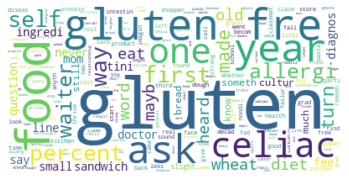

In [33]:
# Generate a word cloud image
text_stemmed=" ".join(tokens_snow)
wc = WordCloud(background_color="white").generate(text_stemmed)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

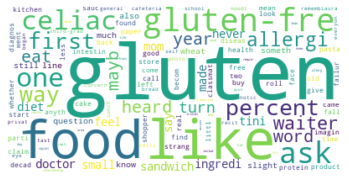

In [34]:
# generate directly from frequency information
wc2 = WordCloud(background_color="white")
wc2.generate_from_frequencies(fd_snow)
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.show()